In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calcY1(x):
    y = (x-1)**2
    return y

In [3]:
def calcY2(x):
    y = x*(x+1.5)*(x-1.5)*(x-2)
    return y

In [4]:
def getDerivative(func,x):
    deriv = -1
    if func == 'calcY1':
        deriv = 2*(x-1)
    elif func == 'calcY2':
        deriv = (x-2)*(x-1.5)*(x)*(x+1.5)
    return deriv

In [5]:
def addPoints(start,end):
    for i in range(start,end+1):
        ylist1.append(calcY1(i))
        ylist2.append(calcY2(i))
        xlist.append(i)
    for i in range(start-1,start-end-1,-1):
        ylist1.insert(0,calcY1(i))
        ylist2.insert(0,calcY2(i))
        xlist.insert(0,i)

In [6]:
ylist1 = list()
ylist2 = list()
xlist = list()
addPoints(0,100)

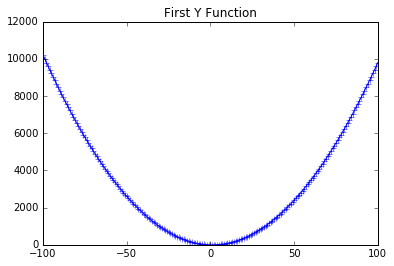

In [7]:
plt.plot(xlist,ylist1,marker='+')
plt.title('First Y Function')
plt.show()

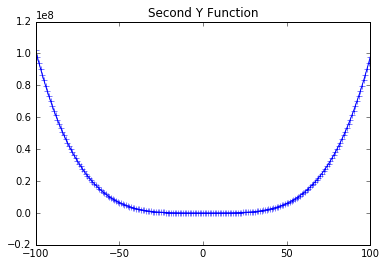

In [8]:
plt.plot(xlist,ylist2,marker='+')
plt.title('Second Y Function')
plt.show()

Random Search Algorithm
 1. For each loop, generate X as a random number between start and end
 2. Use X to calculate Y
 3. Append X and Y to list

In [9]:
import random
def randomSearch(func,start,end):
    lstY = list()
    for x in range(start,end):
        rand = random.randint(start,end)
        y = func(rand)
        lstY.append((rand,y))
    return lstY


[(31, 900), (55, 2916), (75, 5476), (50, 2401), (98, 9409), (77, 5776), (56, 3025), (41, 1600), (53, 2704), (23, 484), (83, 6724), (12, 121), (53, 2704), (58, 3249), (5, 16), (20, 361), (88, 7569), (3, 4), (8, 49), (71, 4900), (40, 1521), (16, 225), (95, 8836), (82, 6561), (36, 1225), (44, 1849), (68, 4489), (75, 5476), (36, 1225), (76, 5625), (38, 1369), (84, 6889), (15, 196), (7, 36), (35, 1156), (0, 1), (54, 2809), (77, 5776), (70, 4761), (31, 900), (18, 289), (2, 1), (8, 49), (99, 9604), (13, 144), (48, 2209), (44, 1849), (45, 1936), (39, 1444), (41, 1600), (71, 4900), (62, 3721), (31, 900), (58, 3249), (72, 5041), (40, 1521), (24, 529), (89, 7744), (81, 6400), (50, 2401), (71, 4900), (71, 4900), (5, 16), (31, 900), (30, 841), (13, 144), (48, 2209), (65, 4096), (40, 1521), (11, 100), (16, 225), (24, 529), (52, 2601), (34, 1089), (31, 900), (62, 3721), (54, 2809), (59, 3364), (48, 2209), (6, 25), (75, 5476), (5, 16), (84, 6889), (15, 196), (21, 400), (59, 3364), (11, 100), (79, 6084

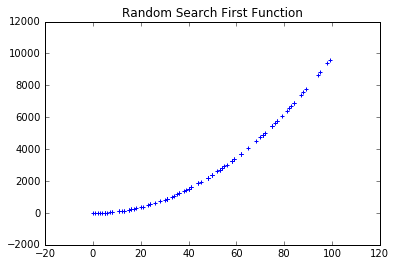

In [10]:
lstY = randomSearch(calcY1,0,100)
print(lstY)
plt.scatter(*zip(*lstY),marker='+')
plt.title('Random Search First Function')
plt.show()

[(21, 175061.25), (82, 44094680.0), (95, 79715996.25), (75, 30784556.25), (53, 7586645.25), (95, 79715996.25), (94, 76394270.0), (38, 1972314.0), (71, 24684836.25), (36, 1583550.0), (87, 55956116.25), (43, 3255820.25), (4, 110.0), (81, 41969441.25), (3, 20.25), (32, 980880.0), (70, 23313290.0), (81, 41969441.25), (42, 2959740.0), (56, 9476460.0), (32, 980880.0), (75, 30784556.25), (15, 43436.25), (6, 810.0), (70, 23313290.0), (47, 4667276.25), (73, 27608545.25), (22, 211970.0), (24, 302940.0), (70, 23313290.0), (54, 8181810.0), (26, 420420.0), (88, 58589564.0), (26, 420420.0), (53, 7586645.25), (95, 79715996.25), (90, 64134180.0), (82, 44094680.0), (34, 1255280.0), (33, 1111745.25), (10, 7820.0), (44, 3573570.0), (90, 64134180.0), (2, 0.0), (28, 569114.0), (39, 2191556.25), (32, 980880.0), (27, 490556.25), (93, 73177445.25), (9, 4961.25), (17, 73121.25), (81, 41969441.25), (83, 46299620.25), (49, 5524321.25), (89, 61314881.25), (41, 2684321.25), (86, 53412450.0), (21, 175061.25), (57, 

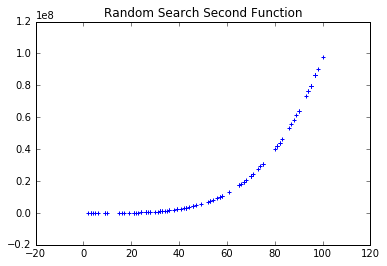

In [11]:
lstY2 = randomSearch(calcY2,0,100)
print(lstY2)
plt.scatter(*zip(*lstY2),marker='+')
plt.title('Random Search Second Function')
plt.show()

 Hill Climbing Algorithm
 1. If currentY is greater than nextY then we go downhill
 2. Continue looping while true, append X and Y to list, increment X and Y
 3. Return list once not true
 4. Else if currentY is less than nextY then we go uphill
 5. Continue looping while less than 10, append X and Y to list, increment X and Y
 6. Return list once not true

In [12]:
def hillClimb(func,start,steps):
    lstY = list()
    currentpos = start
    Y_val_curr = func(currentpos)
    Y_val_next = func(currentpos + steps)
    Y_val_prev = func(currentpos - steps)
    iterations = 0
    if Y_val_curr > Y_val_next:
        while True:
            lstY.append((currentpos,Y_val_curr))
            if Y_val_curr < Y_val_next:
                return lstY
            Y_val_curr = Y_val_next
            currentpos = currentpos + steps
            Y_val_next = func(currentpos + steps)
    else:  
        while True:
            if iterations == 10:
                return lstY
            lstY.append((currentpos,Y_val_curr))           
            Y_val_curr = Y_val_next
            currentpos = currentpos + steps
            Y_val_next = func(currentpos + steps)
            iterations = iterations + 1

[(0, 1), (0.5, 0.25), (1.0, 0.0)]


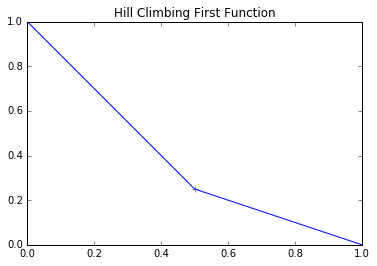

In [13]:
lstY = hillClimb(calcY1,0,0.5)
print(lstY)
plt.plot(*zip(*lstY),marker='+')
plt.title('Hill Climbing First Function')
plt.show()

[(20, 361), (20.5, 380.25), (21.0, 400.0), (21.5, 420.25), (22.0, 441.0), (22.5, 462.25), (23.0, 484.0), (23.5, 506.25), (24.0, 529.0), (24.5, 552.25)]


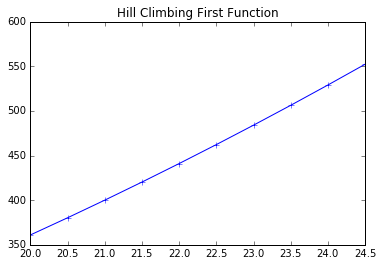

In [14]:
lstY = hillClimb(calcY1,20,0.5)
print(lstY)
plt.plot(*zip(*lstY),marker='+')
plt.title('Hill Climbing First Function')
plt.show()

[(0, 0.0), (0.5, 1.5), (1.0, 1.25), (1.5, -0.0), (2.0, 0.0), (2.5, 5.0), (3.0, 20.25), (3.5, 52.5), (4.0, 110.0), (4.5, 202.5)]


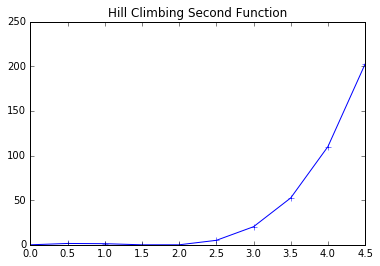

In [15]:
lstY2 = hillClimb(calcY2,0,0.5)
print(lstY2)
plt.plot(*zip(*lstY2),marker='+')
plt.title('Hill Climbing Second Function')
plt.show()

[(20, 143190.0), (20.5, 158526.5), (21.0, 175061.25), (21.5, 192855.0), (22.0, 211970.0), (22.5, 232470.0), (23.0, 254420.25), (23.5, 277887.5), (24.0, 302940.0), (24.5, 329647.5)]


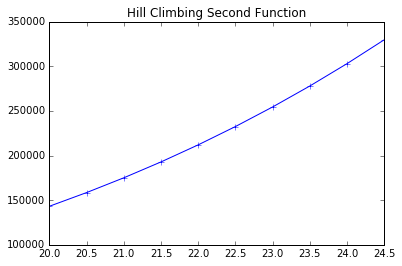

In [16]:
lstY2 = hillClimb(calcY2,20,0.5)
print(lstY2)
plt.plot(*zip(*lstY2),marker='+')
plt.title('Hill Climbing Second Function')
plt.show()

 Gradient Ascent Algorithm
 1. If x is less than zero, loop while true
 2. Use x to calculate y
 3. Set x to x - steps * derivative
 4. Append x and y to list
 5. Else loop
 6. Repeat steps 2,3,4

In [17]:
def gradient(func,start,steps):
    x = start
    y = func(x)
    points = list()
    points.append((x,y))
    if x < 0:
        while x < 0:
            y = func(x)
            x = x - steps * getDerivative(func,x)
            points.append((x,y))
    else:
        while x < 10:
            y = func(x)
            x = x - steps * getDerivative(func,x)
            points.append((x,y))
    return points

[(0, 1), (0.5, 1), (1.0, 0.25), (1.5, 0.0), (2.0, 0.25), (2.5, 1.0), (3.0, 2.25), (3.5, 4.0), (4.0, 6.25), (4.5, 9.0), (5.0, 12.25), (5.5, 16.0), (6.0, 20.25), (6.5, 25.0), (7.0, 30.25), (7.5, 36.0), (8.0, 42.25), (8.5, 49.0), (9.0, 56.25), (9.5, 64.0), (10.0, 72.25)]


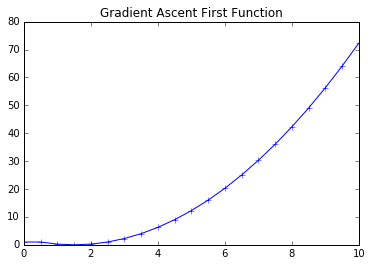

In [18]:
ylist = gradient(calcY1,0,0.5)
print(ylist)
plt.plot(*zip(*ylist),marker='+')
plt.title('Gradient Ascent First Function')
plt.show()

[(-20, 441), (-19.5, 441), (-19.0, 420.25), (-18.5, 400.0), (-18.0, 380.25), (-17.5, 361.0), (-17.0, 342.25), (-16.5, 324.0), (-16.0, 306.25), (-15.5, 289.0), (-15.0, 272.25), (-14.5, 256.0), (-14.0, 240.25), (-13.5, 225.0), (-13.0, 210.25), (-12.5, 196.0), (-12.0, 182.25), (-11.5, 169.0), (-11.0, 156.25), (-10.5, 144.0), (-10.0, 132.25), (-9.5, 121.0), (-9.0, 110.25), (-8.5, 100.0), (-8.0, 90.25), (-7.5, 81.0), (-7.0, 72.25), (-6.5, 64.0), (-6.0, 56.25), (-5.5, 49.0), (-5.0, 42.25), (-4.5, 36.0), (-4.0, 30.25), (-3.5, 25.0), (-3.0, 20.25), (-2.5, 16.0), (-2.0, 12.25), (-1.5, 9.0), (-1.0, 6.25), (-0.5, 4.0), (0.0, 2.25)]


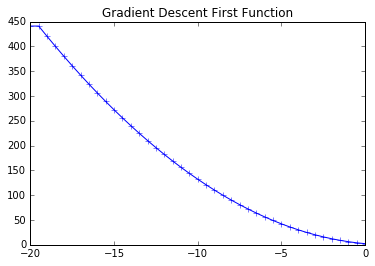

In [19]:
ylist = gradient(calcY1,-20,0.5)
print(ylist)
plt.plot(*zip(*ylist),marker='+')
plt.title('Gradient Descent First Function')
plt.show()

[(0, 0.0), (0.5, 0.0), (1.0, 1.5), (1.5, 1.25), (2.0, -0.0), (2.5, 0.0), (3.0, 5.0), (3.5, 20.25), (4.0, 52.5), (4.5, 110.0), (5.0, 202.5), (5.5, 341.25), (6.0, 539.0), (6.5, 810.0), (7.0, 1170.0), (7.5, 1636.25), (8.0, 2227.5), (8.5, 2964.0), (9.0, 3867.5), (9.5, 4961.25), (10.0, 6270.0)]


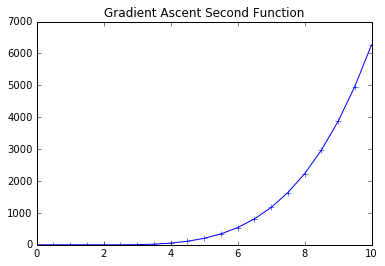

In [20]:
ylist2 = gradient(calcY2,0,0.5)
print(ylist2)
plt.plot(*zip(*ylist2),marker='+')
plt.title('Gradient Ascent Second Function')
plt.show()

[(-20, 175010.0), (-19.5, 175010.0), (-19.0, 158476.5), (-18.5, 143141.25), (-18.0, 128945.0), (-17.5, 115830.0), (-17.0, 103740.0), (-16.5, 92620.25), (-16.0, 82417.5), (-15.5, 73080.0), (-15.0, 64557.5), (-14.5, 56801.25), (-14.0, 49764.0), (-13.5, 43400.0), (-13.0, 37665.0), (-12.5, 32516.25), (-12.0, 27912.5), (-11.5, 23814.0), (-11.0, 20182.5), (-10.5, 16981.25), (-10.0, 14175.0), (-9.5, 11730.0), (-9.0, 9614.0), (-8.5, 7796.25), (-8.0, 6247.5), (-7.5, 4940.0), (-7.0, 3847.5), (-6.5, 2945.25), (-6.0, 2210.0), (-5.5, 1620.0), (-5.0, 1155.0), (-4.5, 796.25), (-4.0, 526.5), (-3.5, 330.0), (-3.0, 192.5), (-2.5, 101.25), (-2.0, 45.0), (-1.5, 14.0), (-1.0, -0.0), (-0.5, -3.75), (0.0, -2.5)]


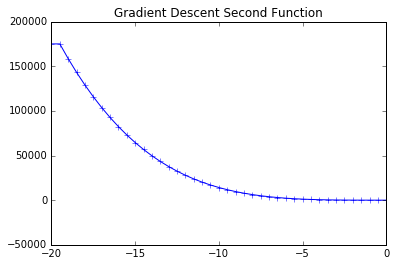

In [21]:
ylist2 = gradient(calcY2,-20,0.5)
print(ylist2)
plt.plot(*zip(*ylist2),marker='+')
plt.title('Gradient Descent Second Function')
plt.show()

 Simulated Annealing Algorithm
 1. Set X to random number between start and end
 2. Use X to calculate Y
 3. Set bestY to Y
 4. Set newX to random number within 10 of x
 5. Use newX to calculate newY
 6. If newY is less than bestY then set bestY to newY, append newX and newY to list
 7. Else generate random 
 8. If random number is between bestY and newY, then set bestY to newY, append newX and newY to list
 9. Repeat steps 4 to 8 until number of iterations equals end

In [22]:
import random
def simAnnealing(func,start,end):
    x = random.randint(start,end)
    y = func(x)
    bestY = y
    lstY = list()
    lstY.append((x,y))
    iterations = 0
    while iterations < 100:
        newX = random.randint(x-10,x+10)
        newY = func(newX)         
        if newY < bestY:
            bestY = newY
            lstY.append((newX,newY))
            x = newX
            y = newY
            iterations = 0
        elif newY > bestY:
            rand = random.randint(x,x+10)
            if rand > int(bestY) & rand < int(newY):
                lstY.append((newX,newY))
                x = newX
                y = newY
        if x == end:
            break     
        iterations = iterations + 1
    print('minimum', bestY)
    return lstY

('minimum', 0)
[(13, 144), (14, 169), (19, 324), (23, 484), (25, 576), (20, 361), (18, 289), (11, 100), (10, 81), (6, 25), (7, 36), (1, 0), (9, 64), (6, 25), (12, 121), (8, 49), (0, 1), (0, 1), (0, 1), (2, 1), (3, 4), (7, 36), (16, 225), (6, 25), (-2, 9), (-6, 49), (4, 9), (8, 49), (6, 25), (15, 196), (10, 81), (13, 144), (6, 25), (12, 121), (3, 4), (-4, 25), (2, 1), (3, 4), (0, 1), (-7, 64), (-17, 324)]


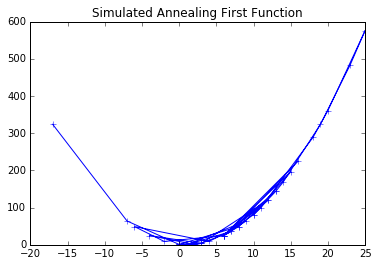

In [23]:
lstY2 = simAnnealing(calcY1,0,100) 
print(lstY2)
plt.plot(*zip(*lstY2),marker='+')
plt.title('Simulated Annealing First Function')
plt.show()

('minimum', -3.75)
[(20, 143190.0), (12, 17010.0), (17, 73121.25), (7, 1636.25), (12, 17010.0), (9, 4961.25), (4, 110.0), (2, 0.0), (-7, 2945.25), (-3, 101.25), (-1, -3.75), (5, 341.25), (-2, 14.0), (-6, 1620.0), (-15, 56801.25), (-22, 254364.0), (-25, 420356.25), (-16, 73080.0), (-19, 143141.25), (-25, 420356.25), (-35, 1583461.25), (-31, 980801.25), (-32, 1111664.0), (-37, 1972220.25), (-42, 3255714.0), (-52, 7586514.0), (-49, 5994476.25), (-57, 10918820.25), (-50, 6494150.0), (-46, 4667160.0), (-53, 8181676.25), (-45, 4278116.25), (-38, 2191460.0), (-46, 4667160.0), (-50, 6494150.0), (-60, 13383630.0), (-70, 24684660.0), (-71, 26115841.25), (-78, 37950120.0), (-87, 58589345.25), (-97, 90333020.25), (-92, 73177214.0), (-94, 79715760.0), (-102, 110341764.0), (-104, 119210780.0), (-102, 110341764.0), (-101, 106097596.25), (-96, 86682960.0), (-93, 76394036.25), (-94, 79715760.0), (-92, 73177214.0), (-96, 86682960.0), (-103, 114712001.25), (-98, 94097150.0), (-102, 110341764.0), (-97, 90

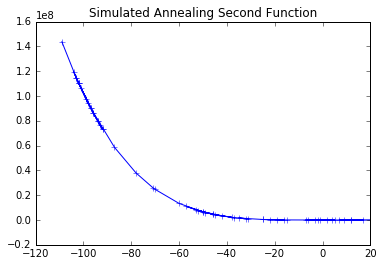

In [24]:
lstY2 =  simAnnealing(calcY2,0,100) 
print (lstY2)
plt.plot(*zip(*lstY2),marker='+')
plt.title('Simulated Annealing Second Function')
plt.show()